<a href="https://colab.research.google.com/github/R329aghav/Raghavjr/blob/main/tensorflow2_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)

2.6.0


In [ ]:
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

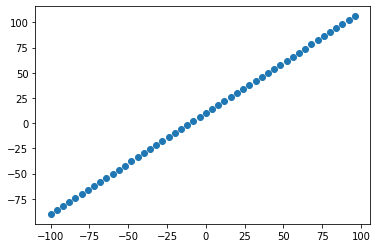

In [ ]:
plt.scatter(X,y)

In [ ]:
# Split the data for training and testing
X_train=X[:40]
y_train=y[:40]
X_test=X[40:]
y_test=y[40:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(TensorShape([40]), TensorShape([10]), TensorShape([40]), TensorShape([10]))

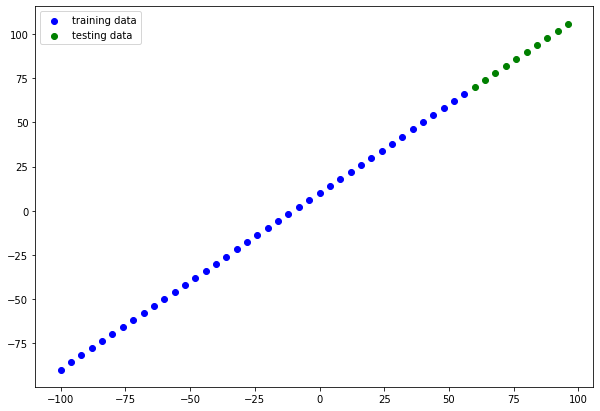

In [ ]:
plt.figure(figsize=(10,7))
#figure for training dataset
plt.scatter(X_train,y_train,c="b",label="training data")
#figure for testing dataset
plt.scatter(X_test,y_test,c="g",label="testing data")
plt.legend();

In [ ]:
#lets create a neural network 
#1. create a model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10,input_shape=[1]),
                           tf.keras.layers.Dense(1)
])

#2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#.fit the model
# model.fit(X_train,y_train,epochs=100,verbose=0)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=0)

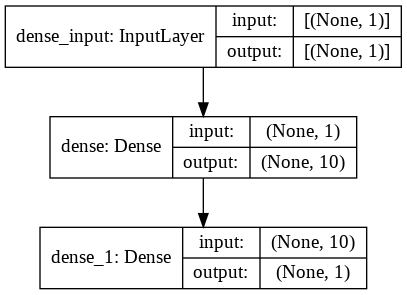

In [ ]:
#visulize the model
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [ ]:
#visulizing the model prediction
y_pred=model.predict(X_test)
y_pred

array([[52.457294],
       [55.853645],
       [59.250004],
       [62.64636 ],
       [66.04271 ],
       [69.43907 ],
       [72.835434],
       [76.23179 ],
       [79.62814 ],
       [83.0245  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# lets create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=y_pred):
  """""

  plot training data,test data and compares predictions to ground truth labels
  """""
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot testing data
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  #plot models prediction in  red
  plt.scatter(test_labels,prediction,c="r",label="perdiction")
  plt.legend();

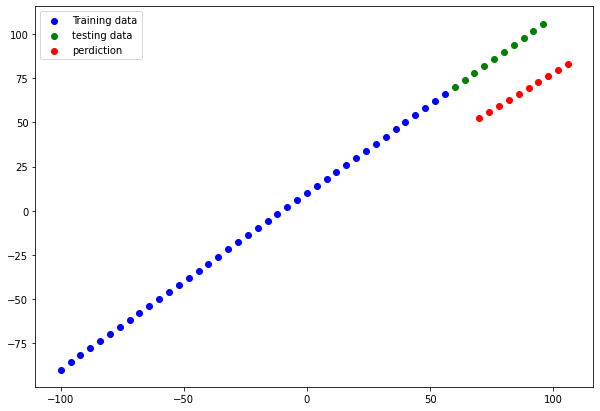

In [ ]:
plot_prediction()

In [ ]:
#evaluating our models prediction with regression evaluation metrics
# different evalution metrics:--MAE:mean absolute error  on average how wrong is each of my models predictions
#MSE:mean Squarr error:--Square the average error
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 103ms/step - loss: 20.2591 - mae: 20.2591


[20.259105682373047, 20.259105682373047]

In [ ]:
y_pred

array([[52.457294],
       [55.853645],
       [59.250004],
       [62.64636 ],
       [66.04271 ],
       [69.43907 ],
       [72.835434],
       [76.23179 ],
       [79.62814 ],
       [83.0245  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
## Evalute the model on the basis of test
model.evaluate(y_test,y_pred)

1/1 [==============================] - 0s 73ms/step - loss: 8.4909 - mae: 8.4909


[8.490890502929688, 8.490890502929688]

In [ ]:
y_pred

array([[52.457294],
       [55.853645],
       [59.250004],
       [62.64636 ],
       [66.04271 ],
       [69.43907 ],
       [72.835434],
       [76.23179 ],
       [79.62814 ],
       [83.0245  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
##calculate the mean absolute error
y_pred

array([[52.457294],
       [55.853645],
       [59.250004],
       [62.64636 ],
       [66.04271 ],
       [69.43907 ],
       [72.835434],
       [76.23179 ],
       [79.62814 ],
       [83.0245  ]], dtype=float32)

In [ ]:
y_pred=tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[52.457294],
       [55.853645],
       [59.250004],
       [62.64636 ],
       [66.04271 ],
       [69.43907 ],
       [72.835434],
       [76.23179 ],
       [79.62814 ],
       [83.0245  ]], dtype=float32)>

In [ ]:
y_pred=tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.457294, 55.853645, 59.250004, 62.64636 , 66.04271 , 69.43907 ,
       72.835434, 76.23179 , 79.62814 , 83.0245  ], dtype=float32)>

In [ ]:
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=20.259104>

In [ ]:
mse=tf.metrics.mean_squared_error(y_true=y_test,y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=413.43756>

In [ ]:
##make the function for mae and mse
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=y_pred)
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)  

In [ ]:
##lets do somme experiments
# 1.create  model with 1  dense layer and 100 epochs
#2.create model with 2 layers and 100 epochs
# 3..create a model with 2 layers and 500 epochs


In [ ]:
# 1.set random seed
tf.random.set_seed(42)
##2.create model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

#3.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

##4.fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.457294, 55.853645, 59.250004, 62.64636 , 66.04271 , 69.43907 ,
       72.835434, 76.23179 , 79.62814 , 83.0245  ], dtype=float32)>

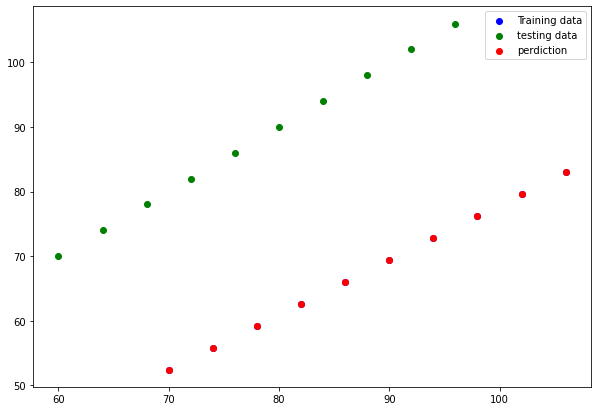

In [ ]:
plot_prediction(y_test,y_pred)

In [ ]:
mae(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=20.259104>

In [ ]:
mse(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=413.43756>

In [ ]:
# 2.create second model
# 2.1 set random seed
tf.random.set_seed(42)
##2.2create a model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.Dense(1)
])
##2.3compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])
##2.4fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 37.5163 - mse: 2051.7371
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 15.3674 - mse: 330.8845
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0486 - mse: 174.4426
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4438 - mse: 109.0568
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1493 - mse: 123.0489
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1722 - mse: 119.4456
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8420 - mse: 223.9998
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 14.4265 - mse: 315.0616
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 22.3205 - mse: 834.9088
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 11.4851 - mse: 178.0412
Epoch 11/100
2/2 [==============================] 

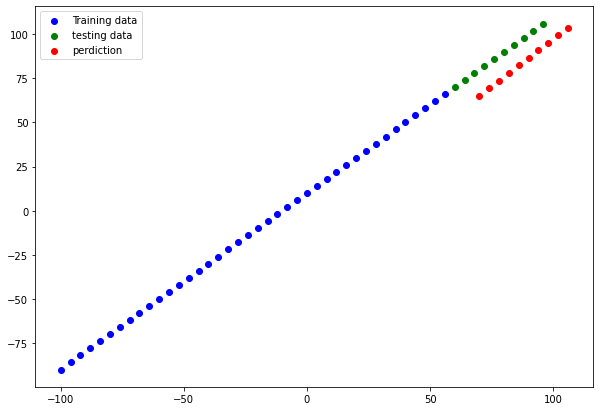

In [ ]:
y_pred_1=model.predict(X_test)
y_pred_1
plot_prediction(prediction=y_pred_1)

In [ ]:
y_pred_1,tf.squeeze(y_pred_1)

(array([[ 65.104515],
        [ 69.39702 ],
        [ 73.689514],
        [ 77.98202 ],
        [ 82.27452 ],
        [ 86.56694 ],
        [ 90.85936 ],
        [ 95.15179 ],
        [ 99.4442  ],
        [103.736626]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 65.104515,  69.39702 ,  73.689514,  77.98202 ,  82.27452 ,
         86.56694 ,  90.85936 ,  95.15179 ,  99.4442  , 103.736626],
       dtype=float32)>)

In [ ]:
mae_1=mae(y_test,tf.squeeze(y_pred_1))
mse_1=mse(y_test,tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=3.5793502>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.51737>)

In [ ]:
###create the third model1
# 1.set random seed
tf.random.set_seed(42)

##2.create the model
model_2=tf.keras.Sequential([
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.Dense(1)
])

##2.compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3.fit the model
model_2.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 38.8952 - mae: 38.8952
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 21.6284 - mae: 21.6284
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 14.4901 - mae: 14.4901
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 16.4775 - mae: 16.4775
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 13.6818 - mae: 13.6818
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 18.8250 - mae: 18.8250
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 14.3851 - mae: 14.3851
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 10.0894 - mae: 10.0894
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 26.5707 - mae: 26.5707
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 29.9993 - mae: 29.9993
Epoch 11/500
2/2 [==============================] - 0s 9ms/

In [ ]:
##lets make and plot prediction
y_pred_2=model_2.predict(X_test)
y_pred_2

array([[105.92939],
       [112.68033],
       [119.43126],
       [126.18217],
       [132.93306],
       [139.68398],
       [146.43488],
       [153.18579],
       [159.93668],
       [166.68759]], dtype=float32)

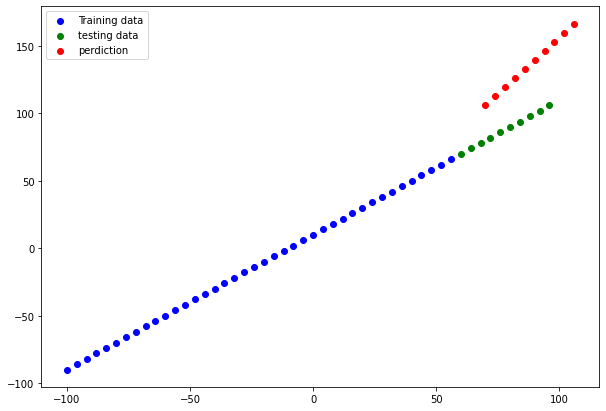

In [ ]:
plot_prediction(prediction=tf.squeeze(y_pred_2))

In [ ]:
####3.lets find mae and mse
mae_2=mae(y_test,tf.squeeze(y_pred_2))
mse_2=mse(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=48.30851>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2396.144>)

In [ ]:
model.summary()            

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##saving our models
##there are twom ways to save models
##1.the save model format
# 2.the HDF5 format


In [ ]:
#save model using the savemodel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
#save model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

In [ ]:
#loading in a saved model
path="/content/best_model_SavedModel_format"
loaded_savedmodel_format=tf.keras.models.load_model(path)
loaded_savedmodel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##save model using savedmodel format
model_2.save('best_model_1_Savedmodel_format')

INFO:tensorflow:Assets written to: best_model_1_Savedmodel_format/assets


In [ ]:
model_2.save('best_model_HDF5_format.h5')

In [ ]:
# loading iin saved model
path="/content/best_model_1_Savedmodel_format"
loaded_savedmodel_format_1=tf.keras.models.load_model(path)
loaded_savedmodel_format_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.save("best_savedmodel_format")

INFO:tensorflow:Assets written to: best_savedmodel_format/assets


In [ ]:
model_2.save("best_hdf5_format.h5")

In [ ]:
# loading saved model
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_savedmodel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds=model_2.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)
model_2_preds==loaded_SavedModel_format_preds


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2,loaded_savedmodel_format

(<keras.engine.sequential.Sequential at 0x7fb2cf53fc90>, array([[105.92939],
        [112.68033],
        [119.43126],
        [126.18217],
        [132.93306],
        [139.68398],
        [146.43488],
        [153.18579],
        [159.93668],
        [166.68759]], dtype=float32))

In [ ]:
##save filr from google colab to google drive
!cp /content/best_hdf5_format.h5 /content/sample_data

cp: cannot stat '/content/best_hdf5_format.h5': No such file or directory


In [ ]:
!ls /content/sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
from google.colab import drive
drive.mount('\content\drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiOa0WAhra-y44aOK6sMANGiYmTw1tPfI5lhNCTEzcy0zdw55UpNog


In [ ]:
#calculate mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae


<tf.Tensor: shape=(), dtype=float32, numpy=20.259104>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.457294, 55.853645, 59.250004, 62.64636 , 66.04271 , 69.43907 ,
       72.835434, 76.23179 , 79.62814 , 83.0245  ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.457294, 55.853645, 59.250004, 62.64636 , 66.04271 , 69.43907 ,
       72.835434, 76.23179 , 79.62814 , 83.0245  ], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.457294, 55.853645, 59.250004, 62.64636 , 66.04271 , 69.43907 ,
       72.835434, 76.23179 , 79.62814 , 83.0245  ], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#calculate absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=20.259104>

In [ ]:
##calculate mean squarred error
mse=tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=413.43756>

In [ ]:
#make some function to reuse mae and mse
def mae(y_true,y_pred):

  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))  

In [ ]:
##running experiments to improve our model
# 1.get more data---more examples
# 2.larger model---no of units(neurons)
# 3.more epochs


# build models
# 1.1 layer 100 epochs
# 2. 2layers 100 epochs
# 3.2 layers 500 epochs

In [ ]:
# model no 1
# 1. create model
model_1=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])
#2.compile our model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. fit our model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8160 - mae: 8.8160
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4374 - mae: 9.4374
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9512 - mae: 11.9512
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1800 - mae: 9.1800
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0313 - mae: 10.0313
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3097 - mae: 9.3097
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4690 - mae: 8.4690
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0316 - mae: 9.0316
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5057 - mae: 18.5057
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9744 - mae: 9.9744
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 8

In [ ]:
#make  and  plot prediction for model_1
y_pred_1=model_1.predict(X_test)
y_pred_1

array([[56.56293 ],
       [60.24667 ],
       [63.93041 ],
       [67.61415 ],
       [71.29788 ],
       [74.98162 ],
       [78.66536 ],
       [82.3491  ],
       [86.03284 ],
       [89.716576]], dtype=float32)

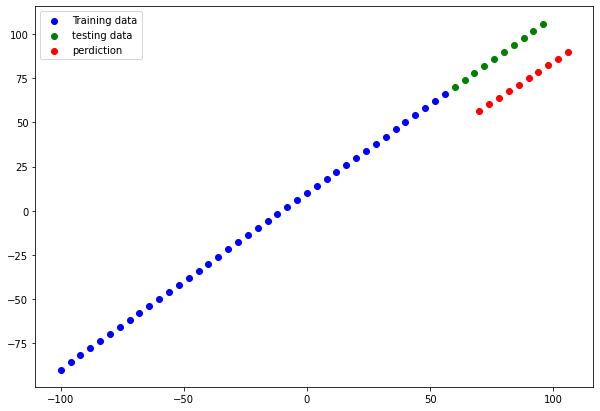

In [ ]:
plot_prediction(prediction=y_pred_1)

In [ ]:
##calculate model_1 evaluation metrics
mae_1=mae(y_test,tf.squeeze(y_pred_1))
mse_1=mse(y_test,tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.860248>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.6521>)

In [ ]:
##build model 2
#2 dense layers trained for 100 epochs
tf.random.set_seed(42)

#1.create the model 
model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

##2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

##3. fit the model
model_2.fit(X_train,y_train,epochs=100)



Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

In [ ]:
y_pred_2=model_2.predict(X_test)
y_pred_2

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
##make and plot prediction
y_pred_2=model_2.predict(X_test)
y_pred_2

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

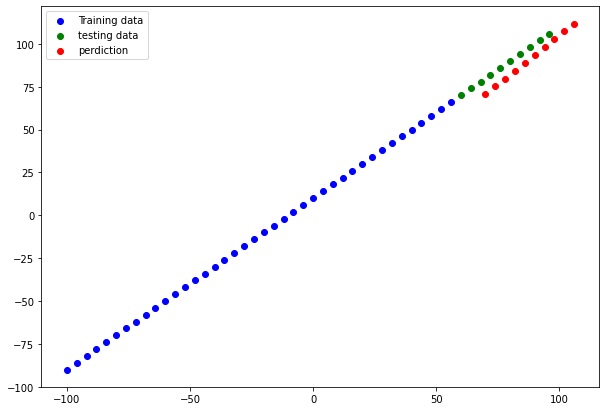

In [ ]:
plot_prediction(prediction=y_pred_2)

In [ ]:
##calculate the model evaluation metrics
mae_2=mae(y_test,tf.squeeze(y_pred_2))
mse_2=mse(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [ ]:
# build model--3
#3 layers and trained for 500 epochs
#set random seeed
tf.random.set_seed(50)

#1.create model_3
model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(50),
                             tf.keras.layers.Dense(1)
])

##2. compile our model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

##3. fit the model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 36.5826 - mae: 36.5826
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 45.1856 - mae: 45.1856
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 30.2020 - mae: 30.2020
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 26.3074 - mae: 26.3074
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 31.1371 - mae: 31.1371
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 15.5187 - mae: 15.5187
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 14.8102 - mae: 14.8102
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 21.9072 - mae: 21.9072
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 10.7176 - mae: 10.7176
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.5105 - mae: 28.5105
Epoch 11/500
2/2 [==============================] - 0s 3ms/

In [ ]:
##make and plot prediction 
y_pred_3=model_3.predict(X_test)
y_pred_3

array([[20.647337],
       [21.784824],
       [22.922314],
       [24.059801],
       [25.197287],
       [26.334774],
       [27.472261],
       [28.609749],
       [29.747234],
       [30.884722]], dtype=float32)

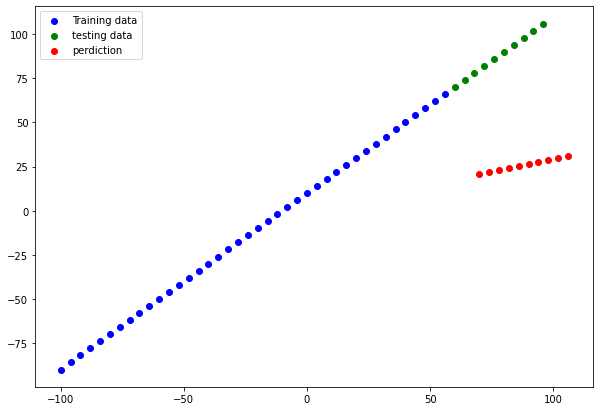

In [ ]:
plot_prediction(prediction=y_pred_3)

In [ ]:
##calculate the evaluation metrics
mae_3=mae(y_test,tf.squeeze(y_pred))

mse_3=mse(y_test,tf.squeeze(y_pred))
mse_3,mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=413.43756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20.259104>)

In [ ]:
##compairing the results of our experiment
#lets compare  our results using a pandas dataframe
import pandas as pd
model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(model_results,columns=["columns","mae","mse"])
all_results               

,columns,mae,mse
0,model_1,14.860248,221.652100
1,model_2,3.196941,13.070143
2,model_3,20.259104,413.437561
